# The Kernel Trick

En la evaluacion de la funcion de costo para SVM, a traves del metodo de multiplicadores de Lagrange, aparecen muchos productos internos de la forma $x_i \cdot x_j$. 

De la clase anterior.

$$L(\lambda) = - \frac12 \sum_i \sum_j  \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda_i    $$
sujeto a  $\sum_i \lambda_i y_i = 0$. $\lambda \perp y$. 

Al principio de la clase de SVM:

$$ \min \frac{\| w \|^2}{2}  \text{ sujeto a  } y^{(i)} ( w^T x^{(i)} - b) \ge 1   \quad (1) $$

$$ w = \sum_i \lambda_i y_i x_i  \quad (2) $$
Reemplazando (2) en la (1) la restriccion.

$$ y^{(i)} ( \sum \lambda_j y_j  x_j \cdot x_i - b) \ge 1 $$

Con el kernel lo que queremos es definir un **"feature mapping "** $\Phi$ que me envia los puntos de un espacio inferior a otro mas amplio donde halla una separacion lineal. 

Si encontramos esa funcion $\Phi$ que nos envia los puntos a un espacio superior donde los datos son linealmente separables, podemos usar SVM.


En este nuevo espacio el lagrangiano se convierte en:


$$L(\lambda) = - \frac12 \sum_i \sum_j  \lambda_i \lambda_j y_i y_j \Phi( x_i) \cdot \Phi(x_j) + \sum_i \lambda_i    $$

$$ y^{(i)} ( \sum \lambda_j y_j  \Phi(x_j) \cdot \Phi(x_i) - b) \ge 1 $$


Vamos a encontrar un $k$ llamado kernel que hace la siguiente function


$$k (x_1, x_2) = \Phi(x_1) \cdot \Phi(x_2) $$.
Isabel Guyon en 1991.

Para explicar la potencia del kernel hacemos algunos ejemplos.

Ejemplos para entender mejor la dimension y el sentido del "kernel trick"

* Tomemos $n=2$, y la funcion

\begin{eqnarray}
\Phi: \mathbb{R}^2 &\to& \mathbb{R}^3 \\ 
(x_1, x_2) &\mapsto& \Phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2)
\end{eqnarray}

Definimos el kernel como $ k(x,y) = (x \cdot y)^2$. 

Vamos a probar $k(x,y) = \Phi(x) \cdot \Phi(y)$.


Tomamos dos puntos $x=(x_1, x_2)$, $y=(y_1, y_2)$. 

$$ k(x,y) = (x \cdot y)^2 = \left (  \sum_{i=1}^2 x_i y_i  \right )^2 \quad (3) $$

De otro lado:

$$ \Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2) \cdot (y_1^2, y_2^2, \sqrt{2} y_1 y_2) = x_1^2 y_1^2 + x_2^2 y_2^2 + 2 x_1 x_2 y_1 y_2  \quad (4) $$
Comparando  (3) con (4) vemos que son iguales. O sea que 
$$ k(x,y) = \Phi(x) \cdot \Phi(y) $$

Contemos operaciones:

* Con el "feature mapping" ($\Phi)$. 2 cuadrados por $x$ y 2 por $y$, dos productos por $x$ y dos productos por $y$. El producto interno con 3 multiplicaciones y dos sumas: Total: 4 cuadrados, 7 productos, 3 sumas.

* Usando el kernel. Un producto interno en $\mathbb{R}^3$. dos multiplicaciones y una sumas, y luego un cuadrado. 

Otro ejemplo:

\begin{eqnarray}
\Phi : \mathbb{R}^3 &\to& \mathbb{R}^6 \\
(x_1, x_2, x_3) & \mapsto & (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3 ) 
\end{eqnarray}

Definimos el kernel como $k(x,y) = (x \cdot y)^2 $. 

Probamos la ecuacion del kernel. 

$$ k(x,y) = \Phi(x) \cdot \Phi(y) $$.

Calculemos primero $k(x,y)$.

$$k(x,y) = ( x \cdot y)^2 = \left (  \sum_{i=1}^3 x_i y_i \right )^2 = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j  $$

Calcumemos ahora $\Phi(x) \cdot \Phi(y)$:


$$ \Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3 ) \cdot (y_1^2, y_2^2, y_3^2, \sqrt{2} y_1 y_2, \sqrt{2} y_1 y_3, \sqrt{2} y_2 y_3 ) = \sum_{i=1} \sum_{j=1} x_i x_j y_i y_j  $$
De forma que $k(x,y) = \Phi(x) \cdot \Phi(y)$.

A contar operaciones:


* Usando el "feature mapping" $\Phi$: 6 cuadrados,  12 productos, 6 productos y 5 sumas Total: 6 cuadrados, 18 productos y 5 sumas

* Usando el kernel $k(x,y)$. 3 multiplicaciones, dos sumas y un cuadrado.

Otro Ejemplo:
Sea $c \in \mathbb{R}$.

Definamos un kernel

\begin{eqnarray}
k(x,y) &=& ( x \cdot y + c )^2 \\
&=& \left (  \sum_{i=1}^3 x_i y_i + c  \right )   \left (  \sum_{i=1}^3 x_i y_i + c  \right )  \\
&=& \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j + 2 c \sum_{i=1}^3 x_i y_i + c^2
\end{eqnarray}



Definamos el siguiente "feature mapping"

\begin{eqnarray}
\Phi : \mathbb{R}^3 &\to& \mathbb{R}^{10} \\
(x_1, x_2, x_3) &\mapsto& (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3, \sqrt{2} c x_1, \sqrt{2} c x_2, \sqrt{2} c x_3, c) 
\end{eqnarray}

Se deja tarea ( no para usted) probar que

$$ k(x,y) = \Phi(x) \cdot \Phi(y)$$

Hay un problema intersante que es la generalizacion de esto (aparece otra vez la combinatoria).

Sea $d \in \mathbb{N}$ , $d \ge 2$. encontrar $\Phi$ tal que 

$$ k(x,y) = ( x \cdot y + c)^d $$, $c \in \mathbb{R}$. 

tal que

$$ k(x,y) = \Phi(x) \cdot \Phi(y)  $$.

Pistas: 

$\Phi$ es un mapping de $\mathbb{R}^n$ en $\mathbb{R}^p$ donde

$$ p = \binom{n+d}{d} $$, o sea

$$\Phi : \mathbb{R}^n \to \mathbb{R}^p  $$

El numero de terminos de la dimension $p$ es enorme cuando $n, d \gg 1$.
Ver la 
[Stirling approximation](https://en.wikipedia.org/wiki/Stirling%27s_approximation)
el numero de terminos crece exponencialmente co ($n$, $d$). De forma que el costo de calcular $\Phi(x) \cdot \Phi(y)$ es enorme. Mientras que el costo de evaluar $k(x,y)$ es: n multiplicaciones, n sumas, y una potencia a la $^d$.


* Kernel exponencial:
En este ejemplo vemos como construir un kernel $k$ el cual tendria un feature mapping $\Phi$ que va al infinito en numero de terminos.  

El kernel es:

$$ k(x_i, x_j) = \mathrm{e}^{- \frac{(x_i -x_j)^2}{2 \sigma^2}}$$

$$(x_i - x_j)^2 = \| x_i - x_j \|^2 = (x_i - x_j)^T (x_i - x_j) = \langle x_i - x_j, x_i - x_j \rangle = (x_i - x_j ) \cdot (x_i - x_j)  $$


Tarea para mi: (para hacer ya): Encontrar un "feature mapping" $\Phi$ tal que

$k(x_i, x_j) = \Phi(x_i) \cdot \Phi(x_j)$.

Por comodidad, simplicidad (pereza) vamos solo a una variable $x_i, x_j \in \mathbb{R}$. 


$$ \mathbb{e}^{\theta} = 1 + \theta + \frac{\theta^2}{2!} + \cdots + \frac{\theta^n}{n!} + \cdots $$

Calculemos $\mathbb{e}^{-\frac{(x_i - x_j)^2}{2 \sigma^2}}$.




\begin{eqnarray}
\mathbb{e}^{-\frac{(x_i - x_j)^2}{2 \sigma^2}} &=& \mathrm{e}^{-  \frac{x_i^2 + x_j^2}{2 \sigma^2}}  \mathbb{e}^{\frac{x_i x_j}{ \sigma^2}} \\
&=&\mathrm{e}^{-  \frac{x_i^2 + x_j^2}{2 \sigma^2}}
\left ( 1 + \frac{x_i x_j}{ \sigma^2} + \left ( \frac{x_i x_j}{ \sigma^2}  \right )^2 / 2! + \left ( \frac{x_i x_j}{ \sigma^2}
    \right )^3 /3!  + \cdots + \left ( \frac{x_i x_j}{ \sigma^2} \right )^n/n! 
    \right )  \\
    &=& \mathrm{e}^{-  \frac{x_i^2 + x_j^2}{2 \sigma^2}} \left (
        (1) (1)  + \frac{x_i}{\sigma} \frac{x_j}{\sigma} 
        + \frac{x_i^2}{\sqrt{2!} \sigma^2} \frac{x_j^2}{\sqrt{2!} \sigma^2} +   \frac{x_i^3}{\sqrt{3!}\sigma^3} \frac{x_j^3}{\sqrt{3!} \sigma^3} + \cdots + \frac{x_i^n}{\sqrt{n!} \sigma^{n}}  \frac{x_j^n}{\sqrt{n!} \sigma^{n}}
        \right ) 
\end{eqnarray}


En este caso 


$$\Phi(x) = \mathrm{e}^{-\frac{x^2}{2 \sigma^2} }
\left (  1, \frac{x}{\sigma} , \frac{x^2}{\sqrt{2!} \sigma^2}, \frac{x^3}{\sqrt{3!} \sigma^3}, \cdots, \frac{x^n}{\sqrt{n!} \sigma^n} + \cdots   \right )  $$

De lo anterior se ve que

$$k(x,y) = \Phi(x) \cdot \Phi(y)$$



Los kernels satisfacen ciertas propiedades.

* Son simetricos. Es decir, $k(x,y) = k(y,x)$. Si lo piensa como matriz $(K)_{ij} = k(x_i, x_j)$ la matriz es simetrica. Es decir $K_{ij}= K_{ji}$.
* Dado un kernel como una matriz simetrica $K$. Esta matriz es diagonalizable. Y por el teorema de diagonalizacion.

$$K = U \Lambda U^T $$
Donde $U$ es una matrix cuyas columnas $U_i$ son autovectores de $K$ y $\Lambda$ es una matriz diagonal con autovalores $\lambda_i$ de $A$. 
Si todos autovalores son positivos o 0 (no es negativamente definida):
Asumimos $K \in \mathbb{R}^{m \times m}$.

\begin{eqnarray}
k_{ij} &=& \sum_{\ell=1}^m u_{i \ell} \lambda_{\ell} u_{j \ell} \\
&=& \sum_{\ell=1}^m \sqrt{\lambda} u_{i \ell} \sqrt{\lambda} u_{j \ell} \\
&=& (\sqrt{\lambda_1} u_{i1}, \sqrt{\lambda_2} u_{i2}, \cdots, \sqrt{\lambda_m} u_{im} ) \cdot (\sqrt{\lambda_1} u_{j1}, \sqrt{\lambda_2} u_{j2} \cdots \sqrt{\lambda_m} u_{jm} )
\quad , \quad (5) 
\end{eqnarray}

De forma que definiendo el mapping


\begin{eqnarray}
\Phi : \mathbb{R}^n &\to& \mathbb{R}^m \\ 
x^{(i)} &\mapsto& ( \sqrt{\lambda_1} u_{i1}, \sqrt{\lambda_2} u_{i2}, \cdots, \sqrt{\lambda_m} u_{im}) 
\end{eqnarray}
Con esta definicion, es obvio de (5) que

$$ (K)_{ij} = k(x^{(i)}, x^{(j)}) = \Phi(x^{(i)}) \cdot \Phi(x^{(j)})  $$

La matriz $K$ se le llama **Gram matrix**
Esto pasa al ser la matriz no negativa definida. Ahora bien
asumamos $k(x,y) = \Phi(x) \cdot \Phi(y)$.

Asuma $c \in \mathbb{R}^m$ con compentes $c_i$. 

$$c^T K c = \sum_i \sum_j c_i c_j k(x_i, y_j) = \sum_i \sum_j c_i c_j \Phi(x_i) \cdot  \Phi(x_j)  = \sum_i c_i \Phi(x_i) \cdot  \sum_j c_j \Phi(x_j) = \| \sum_i c_i \Phi(x_i) \|^2 \ \ge  0  $$

Resumen:

Estudiamos en esta clase de hoy, un grupo de kernels importante para tranformar datos de forma que se puedan procesar con SVM.

* Kernel lineal:
$$ k(x,y) = x \cdot y + c$$

* kernel polinomial:

$$ k(x,y) = ( x \cdot y + c )^d$$

* kernel gaussiano:

$$ k(x,y) = \mathrm{e}^{- \frac{\| x - y \|^2}{2 \sigma^2}} $$

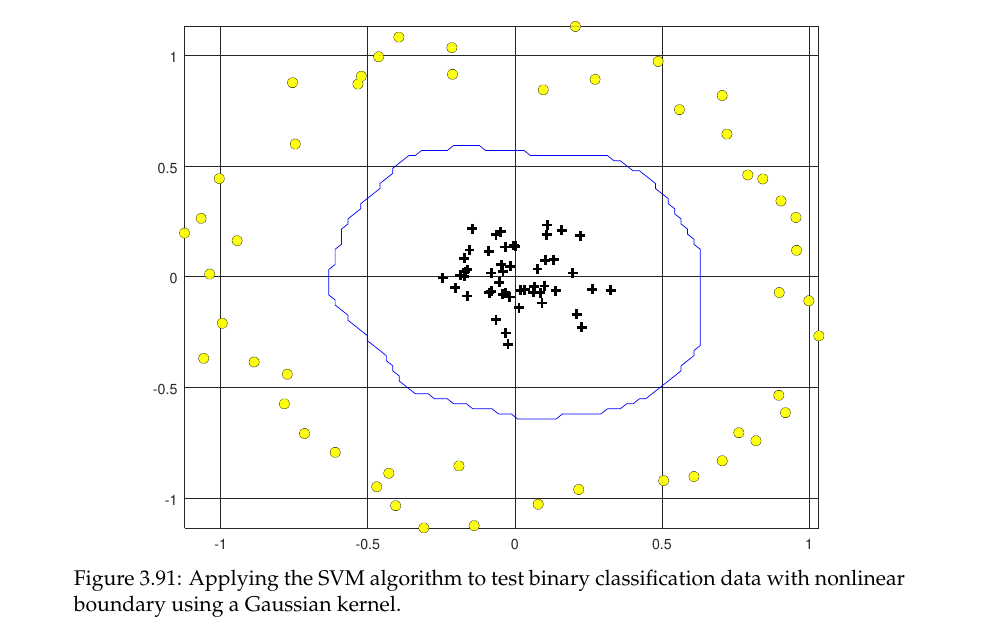

# Aprendizaje no supervisado (no supervised learning)
* Existen situaciones donde no se pueden obtener etiquetas (labels)
* Existen otras donde se pueden obtener "labels" pero pueden ser subjetivos.
* no todo es tan simple como separar elefantes de gatos

Un ejemplo.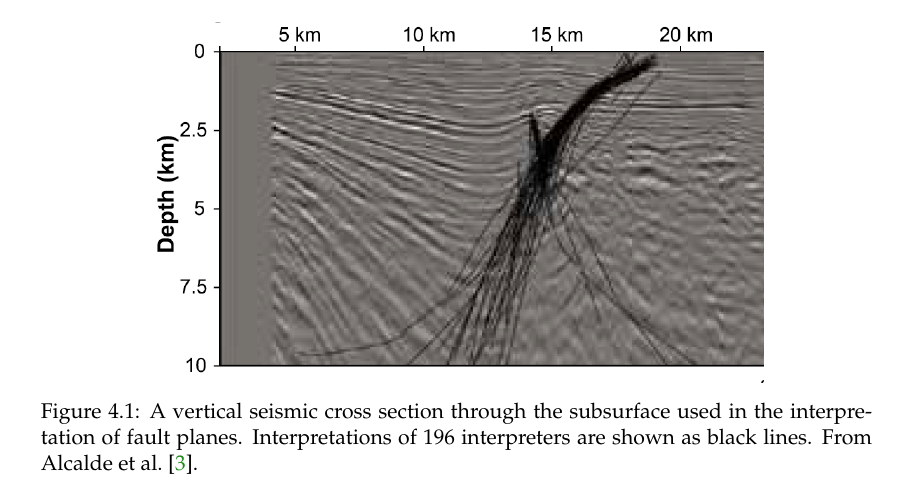

Metodos que vamos a estudiar no supervisados:

* Clustering (agrupamiento)
* Dimensionality Reduction (reduccion de dimensionalidad, Principal component Analysis, SVD
* Deteccion de anomalias

(si el tiempo da, hacemos una clase en en Recommender Systems and OCR).

## Clustering. 
La palabra Clustering es "agrupamiento" significa separar o clasificar objetos en grupos con propiedes comunes y entre ellos diferentes. 

| Tamaño de la casa |
: - :        
820 
910
1100
1100
1400
1400
1500
1600
1804
2010
2040
2040
2500
3200
3400


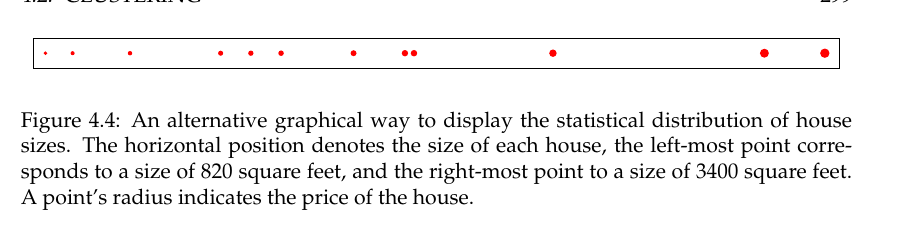

## k-means (k medias)

Los pasos son:

1. Determinar el numero de "clusters"
2. Asociar centros aleatorios a cada cluster.
3. calcular la distancia de cada punto a los centros y etiquetar el punto con el centro.  Llamamos $c$ al vector de etiquetas para los puntos $x_i$. si por ejemplo $c=[1,1,2,3,1,3,2,2]$, quiere decir que el punto $x_1, x_2, x_5$ estan mas cerca al centro $\mu_1$. Que $x_3, x_8, x_9$ estan mas cerca del entro $\mu_2$
y finalmente, que $x_4, x_6$ estan mas cerca del centro $\mu_3$. 
4. Se hallan los "nuevos" centros geometricos. En el ejemplo que estamos considerano

\begin{eqnarray}
\mu_1 = \frac{x_1 + x_2 + x_5 }{3} \\
\mu_2 = \frac{x_3 + x_8 + x_9}{3} \\
\mu_3 = \frac{x_4 + x_6}{2}
\end{eqnarray}

5. se repite desde el articulo 3.

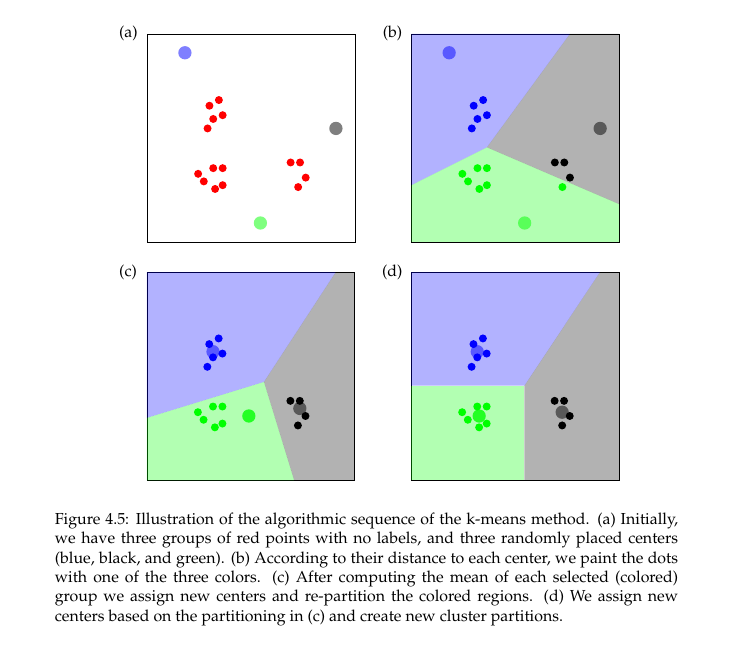

Pregunta Gisela si se pueden considerar pesos en las distancias.
Respuesta si.

[weighted k-means](https://towardsdatascience.com/using-weighted-k-means-clustering-to-determine-distribution-centres-locations-2567646fc31d)

Lo que se quiere con k-means es minimizar una funcion de costo.
Aca usamos la funcion de costo como una metrica para determinar hasta donde queremos ir en el proceso (donde parar las iteraciones).

$$ J(x, c, \mu) = \sum_{i=1}^m \| x_i - \mu_{c_i} \|^2$$

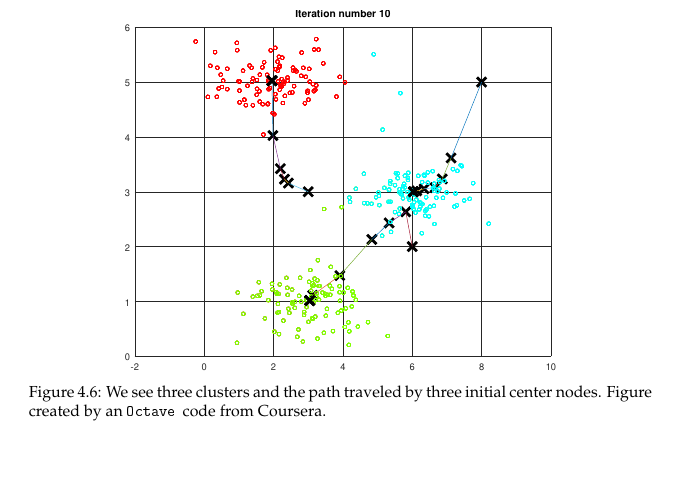